<a href="https://colab.research.google.com/github/vkjadon/AI-ipynb/blob/master/22NN2LPlanar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Package imports
import numpy as np
import copy
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model

%matplotlib inline

In [2]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower
    # print(np.random.randn(N)*0.2)
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        # print(j,ix,t)
        r = a*np.sin(a*t) + np.random.randn(N)*0.20 # radius
        # print(r)
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j        
    X = X.T
    Y = Y.T
    return X, Y

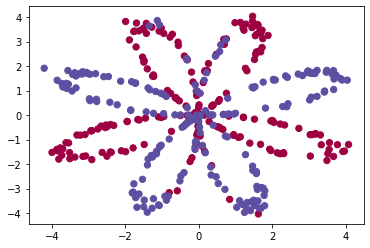

In [3]:
X, Y = load_planar_dataset()
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

In [4]:
print(X.shape, Y.shape)

(2, 400) (1, 400)


In [5]:
m=X.shape[1]
print("training examples", m)

training examples 400


In [6]:
# Train the logistic regression classifier
X_train=X.T
y_train=np.ravel(Y.T)
clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X_train, y_train);

In [7]:
def plot_decision_boundary(X,y,clf=None):
    fig=plt.figure(figsize=(10,6))
    ax = plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y,cmap=plt.cm.Spectral,s=30, zorder=3)
    ax.axis('tight')
    ax.axis('on')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=plt.cm.Spectral,
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


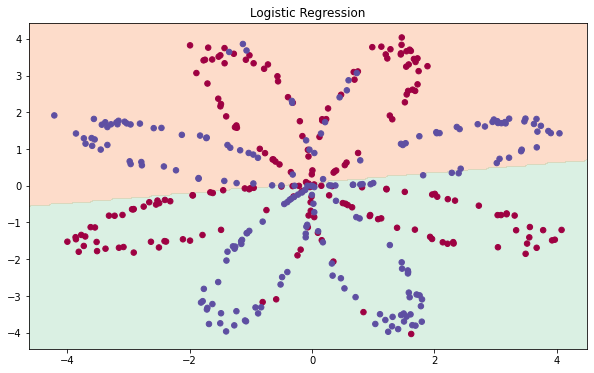

In [8]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(X_train, y_train, clf)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

## One Hidden Layer (2 Layer) Model

In [11]:
print(X.shape, Y.shape)

(2, 200) (1, 200)


In [21]:
# Function to initialize the parameters
def initialize_parameters(n):
    # L=len(n)
    W1=np.random.randn(n[1],n[0]) * 0.01
    b1=np.zeros(n[1]).reshape(n[1],1)
    W2=np.random.randn(n[2],n[1]) * 0.01
    b2=np.zeros(n[2]).reshape(n[2],1)

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

In [25]:
# Function Testing
n=np.array([X.shape[0], 4, Y.shape[0]])
print(n)
parameters=initialize_parameters(n)
print(parameters["W1"])

[2 4 1]
[[ 0.00986196  0.01432756]
 [ 0.00528258 -0.00367732]
 [ 0.00691721 -0.00798347]
 [ 0.00213818  0.01789976]]


In [26]:
def forward_propagation(X, parameters):
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    Z1=np.dot(W1,X)+b1
    A1=np.tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=1/(1+np.exp(-Z2))
    
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [32]:
# Function Testing
A2, cache = forward_propagation(X, parameters)
print("Z1 = " + str(cache["Z1"].shape) + " A1 = " + str(cache["A1"].shape) + " Z2 = " + str(cache["Z2"].shape) + " A2 = " + str(cache["A2"].shape))

Z1 = (4, 200) A1 = (4, 200) Z2 = (1, 200) A2 = (1, 200)


In [9]:
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

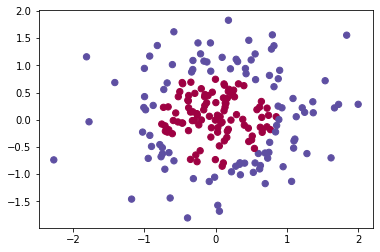

In [10]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

### START CODE HERE ### (choose your dataset)
dataset = "gaussian_quantiles"
### END CODE HERE ###

X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])

# make blobs binary
if dataset == "blobs":
    Y = Y % 2

# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);